### Métodos de integração numérica II (cap. 5.4 + 5.1-3)

---

Resolução dos exercícios da [lista 18-10](exercises/10-18_exercicios.pdf).

1. [Quadratura Gaussiana (cap. 5.4)](#Quadratura-Gaussiana)
    * [Exercício 1](#Exercício-1:)
    * [Exercício 2](#Exercício-2:)
2. [Integração de Monte Carlo (cap. 10)](#Integração-de-Monte-Carlo)
    * [Exercício 3](#Exercício-3:)

In [174]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sci
import math

%pylab inline
pylab.rcParams['figure.figsize'] = (10, 6)

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.5/dist-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['sci']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


### [Quadratura Gaussiana](https://en.wikipedia.org/wiki/Gaussian_quadrature)

A regra de quadratura Gaussiana é uma aproximação da integral de uma função polinomial de grau ate $2n+1$ obtida a partir das $n$ raizes, $(x_0, x_1, ..., x_n)$, do [polinomio de Legendre](https://en.wikipedia.org/wiki/Legendre_polynomials), da forma:

$$\int _{-1}^{1}f(x)\,dx\approx \sum _{i=1}^{n}w_{i}f(x_{i})$$

**Vimos tambem na aula o calculo obtido a partir de outro produto interno:**

Sejam $(x_0, x_1, ..., x_n)$ pontos escolhidos no intervalo $[-1, 1]$, e temos $y_i = f(x_i)$. Vamos definir o produto interno de duas funções como:

$$<p, q> = \int_{-1}^{1} p(x)q(x)dx$$

Dividindo $f(x)$ por um polinômio $p(x)$, obtemos:

$$f(x) = p(x)q(x) + r(x)$$

Nosso objetivo é **calular a integral de $f(x)$ a partir de $r(x)$, um polinômio de grau menor**. Para isso, precisamos que $p(x)q(x) = <p(x), q(x)> = 0$, logo:

$$<p(x), q(x)> = \int_{-1}^{1} p(x)q(x)dx = 0$$

Sendo a base $\{p_0, p_1, p_2, ..., p_n\}$, com $p_n(x) = \sum_{i=0}^{n} a_ix^i$, queremos que ela seja uma **base ortonormal**, pois a base gera todo o espaço $\mathbb{R}^{n-1}$ e temos que:

$$\mbox{(i) }<p_i, p_j> =  \int_{-1}^{1} p_i p_j dx = 0$$
$$\mbox{(ii) }\lVert{p_i(x)}\rVert =  \sqrt{\int_{-1}^{1} p_i^2(x)dx}$$

Logo, o polinômio de maior grau, **$p_n(x)$, será ortogonal a todos os polinômios de menor grau**, e basta termos o grau de $q(x)$ menor que $n$. Obtemos o polinômio $p_n$ através do [processo de Gram-Schimdt](https://pt.wikipedia.org/wiki/Processo_de_Gram-Schmidt).

$$\begin{eqnarray} 
\int_{-1}^{1} f(x)dx & = & \int_{-1}^{1} p_n(x)q(x)dx + \int_{-1}^{1} r(x)dx \\
& = & <p_n(x), q(x)> + \int_{-1}^{1} r(x)dx \\
& = & \int_{-1}^{1} r(x)dx 
\end{eqnarray}$$

#### Exercício 1:

Implemente a quadratura gaussiana com apenas 3 pontos para estimar a integral$\int_{-1}^{1} f(x)dx$.

**R:** Com 3 pontos, temos que:

$$\int _{-1}^{1}f(x)dx \approx \sum _{i=1}^{n}w_{i}f(x_{i}) = w_0f(x_0) + w_1f(x_1) + w_2f(x_2)$$

Sendo $x_0, x_1, x_2$ [raizes do polinomio de Legendre](https://en.wikipedia.org/wiki/Gaussian_quadrature#Gauss%E2%80%93Legendre_quadrature).

In [53]:
def quad_Gaussiana(f, a=-1, b=1):
    
    """
    Calcula a integral de f(x) (grau 2) no intervalo [-1,1] a partir da regra de quadratura Gaussiana para 3 pontos.
    
    :param f: funcao de grau 2
    :param a: lower bound de integração
    :param b: upper bound de integração
    
    :return: valor aproximado da integral
    """
    
    x = np.array([0, -(3/5)**(1/2), (3/5)**(1/2)])
    w = np.array([8/9, 5/9, 5/9])
    
    I = sum(w*f(x))
    
    return I

#### Exercício 2:

Mostre através de exemplos que o método é exato para funções $f(t)$ polinomiais de grau até 5.

In [56]:
import scipy.integrate as integrate

In [99]:
def compare_integrate(f, a, b):
    
    """
    Printa os resultados do integral pelo método de Quadratura Gaussiana e o padrão do do pacote scipy.integrate
    
    :param f: função lambda
    :param a: lower bound de integração
    :param b: upper bound de integração
    """

    I1 = integrate.quad(f, a, b)[0]
    I2 = quad_Gaussiana(f, a, b)
    
    print('Resultados para os dois métodos: \n')
    print('scipy.integrate.quad: '+str(I1))
    print('Quadratura Gaussiana: '+str(I2)+'\n')
    
    if round(I1,4) != round(I2,4):
        
        print('>>> A quadratura gaussiana não é exata para f')

In [100]:
f = lambda x : x**2 + x + 1
compare_integrate(f, -1, 1)

Resultados para os dois métodos: 

scipy.integrate.quad: 2.666666666666667
Quadratura Gaussiana: 2.666666666666667



In [101]:
f = lambda x : x**3 + x
compare_integrate(f, -1, 1)

Resultados para os dois métodos: 

scipy.integrate.quad: 0.0
Quadratura Gaussiana: 0.0



In [102]:
f = lambda x : x**4 + 2*x**2 + 5
compare_integrate(f, -1, 1)

Resultados para os dois métodos: 

scipy.integrate.quad: 11.733333333333333
Quadratura Gaussiana: 11.733333333333334



In [103]:
f = lambda x : x**5 + 2*x**2 + 5
compare_integrate(f, -1, 1)

Resultados para os dois métodos: 

scipy.integrate.quad: 11.333333333333332
Quadratura Gaussiana: 11.333333333333334



In [104]:
f = lambda x : x**6 + 2*x**2 + 5
compare_integrate(f, -1, 1)

Resultados para os dois métodos: 

scipy.integrate.quad: 11.61904761904762
Quadratura Gaussiana: 11.573333333333334

>>> A quadratura gaussiana não é exata para f


In [105]:
f = lambda x : x**8 + 2*x**4
compare_integrate(f, -1, 1)

Resultados para os dois métodos: 

scipy.integrate.quad: 1.0222222222222224
Quadratura Gaussiana: 0.9440000000000002

>>> A quadratura gaussiana não é exata para f


### [Integração de Monte Carlo](https://en.wikipedia.org/wiki/Monte_Carlo_integration)

Esse é um método de integração numérica que calcula a aproximação da integral a partir de pontos aleatórios no intervalo de integração.

$$V=\int _{R}d{\mathbf{x}}$$

Sejam $\mathbf{x}_{1},\cdots ,\mathbf{x}_{n}\in R$ pontos aleatórios no intervalo de integração ($R \subset \mathbb{R}^k)$.
Logo, a integral de $I = \int _{R}f({\mathbf{x}})\,d{\mathbf{x}}$ é aproximada por:

$$I\approx V{\frac {1}{N}}\sum _{i=1}^{n}f(\mathbf{x}_{i}) = V \langle f\rangle$$

Sendo $V$ o volume do intervalo,$V=\int _{R}d\mathbf{x}$, e $\langle f\rangle$ o valor médio de $f$ em $R$.

A principal vantagem em relação aos demais métodos é que pode ser **facilmente generalizado**, utilizado para múltiplas dimensões como descrito acima.

#### Exercício 3:

Use Monte Carlo para estimar o valor da integral $\int\int_R 1 - x^2 - y^2 dA$, onde $R = \{ x^2 + y^2 \leq 1 \}$

**R:** Vamos gerar pontos aleatórios contidos em $R$, ou seja, $(x,y) : x^2 + y^2 \leq 1$, e verificar qual a proporção dos valores $f(x, y)$ que está abaixo do paraboloide $f(x,y) = 1 - (x^2 +y^2)$, cuja visualização foi gerada no [Geogebra 3D Graphing](https://www.geogebra.org/3d?lang=en):

<img src="files/images/10-18_exercise_3.png" width="500">

Para entender a implementação do método, assiti ao [vídeo *Monte Carlo Integration In Python For Noobs*](https://www.youtube.com/watch?v=WAf0rqwAvgg). 

Primeiro, geramos pontos aleatórios na $R = \{x^2 + y^2 \leq 1\}$ da forma $(x, y) = (cos(2\pi p)r$, sendo $p, r \in [0, 1)$ os números aleatórios.

In [152]:
from scipy import random

# Gera 100 números dentro do círculo

n = 100

p = random.sample(n)
r = random.sample(n)

x_n = [(math.cos(p[i]*2*math.pi)*math.sqrt(r[i]), 
       math.sin(p[i]*2*math.pi)*math.sqrt(r[i])) 
      for i in range(n)]

In [153]:
x_n[:10]

[(0.4587398801334188, -0.6951032039289265),
 (0.686434921329396, 0.30641656802395834),
 (0.06023163200504443, -0.039462727721151634),
 (-0.36807985337906635, 0.3434791045568539),
 (0.05560479728004337, 0.7718132431136645),
 (-0.6797660466927461, -0.041482522577981275),
 (-0.6244434299140322, 0.6405047244559288),
 (-0.5729012231889908, -0.7164106232541663),
 (0.18515430410263745, -0.7136763145440177),
 (-0.6272688947400749, -0.20103005149382888)]

O volume da região $R = \{x^2 + y^2 \leq 1\}$ é dado pela área do círculo, logo $V_R = 2\pi$.

In [154]:
V = 2*math.pi
f = lambda x: 1 - x[0]**2 - x[1]**2

# Aproximação do valor médio de f no intervalo
fx_n = sum([f(x) for x in x_n])/n

# Aproximação da integral de f no intervalo
I = V*fx_n

I

3.4280360474199925

Agora, amostrando com $100, 200, 300, ..., 10000$ pontos, temos:

In [181]:
def generate_circle_random_points(n):

    """
    Gera n pontos aleatórios dentro do círculo C = {x² + y² =< 1}.
    
    :param n: número de pontos
    
    :return x_n: pontos aleatórios em C
    """
    
    p = random.sample(n)
    r = random.sample(n)

    x_n = [(math.cos(p[i]*2*math.pi)*math.sqrt(r[i]), 
           math.sin(p[i]*2*math.pi)*math.sqrt(r[i])) 
          for i in range(n)]
    
    return x_n
    
    
def MonteCarlo(x_n, f, V):
    
    """
    Calcula a integral de f definida na região R por Monte Carlo.
    
    :param x_n: pontos aleatórios em R
    :param f: função a ser integrada
    :param V: volume de R
    
    :return I: aproximação da integral de f
    """

    # Aproximação do valor médio de f no intervalo
    fx_n = sum([f(x) for x in x_n])/n

    # Aproximação da integral de f no intervalo
    I = V*fx_n

    return I


n_range = [100*i for i in range(1,101)]
I_n = [I]
f = lambda x: 1 - x[0]**2 - x[1]**2

for n in n_range[1:]:
    
    I_n.append(MonteCarlo(generate_circle_random_points(n),f,  V))

**Podemos observar abaixo que, ao aumentarmos os pontos, a variância das aproximações vai diminuindo!**

Text(0,0.5,'Aproximação da integral de $f$ em $R$ por Monte Carlo ($I$)')

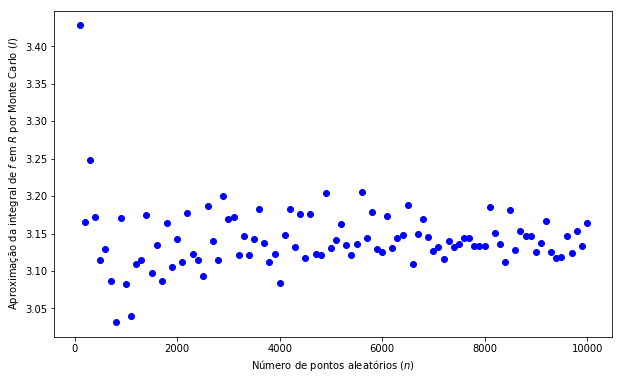

In [182]:
plt.plot(n_range, I_n, 'bo')
plt.xlabel('Número de pontos aleatórios ($n$)')
plt.ylabel('Aproximação da integral de $f$ em $R$ por Monte Carlo ($I$)')